In [1]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv("../Data/dataset_dk3619_preprocessed_v1.csv")

### Choose Feauture will use for Model

In [4]:
columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
              'weekday_name', 'quarter', 'month', 'year', 'day_of_year',
              'day_of_month', 'week_of_year', 'season', 'holiday', 'Consumption_MWh']

df_filter = df[df['DK3619Code'] == 'M_MA']

df_corr = df_filter[columns]
#df_corr = pd.get_dummies(df_corr, columns=['DK3619Code'], prefix=['DK3619Code'])


In [5]:
df_corr.columns

Index(['HourUTC', 'HourDK', 'hour', 'day_of_week', 'weekday_name', 'quarter',
       'month', 'year', 'day_of_year', 'day_of_month', 'week_of_year',
       'season', 'holiday', 'Consumption_MWh'],
      dtype='object')

In [7]:
### Mapping data to numberic 

weekday_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

df_corr['weekday_name'] = df_corr['weekday_name'].map(weekday_mapping)


C:\Users\danny.ha\AppData\Local\Temp\ipykernel_9276\3445385018.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['weekday_name'] = df_corr['weekday_name'].map(weekday_mapping)


In [8]:
### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df_corr['season'] = df_corr['season'].map(seasons_mapping)

C:\Users\danny.ha\AppData\Local\Temp\ipykernel_9276\3343511339.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['season'] = df_corr['season'].map(seasons_mapping)


In [9]:
df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.drop(['HourUTC', 'HourDK'], axis=1)
correlation_matrix = df_corr.corr()

print(correlation_matrix)

C:\Users\danny.ha\AppData\Local\Temp\ipykernel_9276\4229419573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
C:\Users\danny.ha\AppData\Local\Temp\ipykernel_9276\4229419573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


                     hour  day_of_week  weekday_name   quarter     month  \
hour             1.000000     0.000016           NaN -0.000426 -0.000319   
day_of_week      0.000016     1.000000           NaN  0.000564  0.001602   
weekday_name          NaN          NaN           NaN       NaN       NaN   
quarter         -0.000426     0.000564           NaN  1.000000  0.971198   
month           -0.000319     0.001602           NaN  0.971198  1.000000   
year             0.000018    -0.000519           NaN -0.120961 -0.121763   
day_of_year     -0.000321     0.001509           NaN  0.968086  0.996492   
day_of_month    -0.000017    -0.000962           NaN  0.013639  0.011161   
week_of_year    -0.000321     0.000235           NaN  0.947889  0.972474   
season          -0.000286     0.000106           NaN  0.213887  0.206307   
holiday          0.000227     0.009781           NaN -0.050583 -0.052024   
Consumption_MWh  0.061940    -0.279271           NaN -0.128351 -0.117870   

           

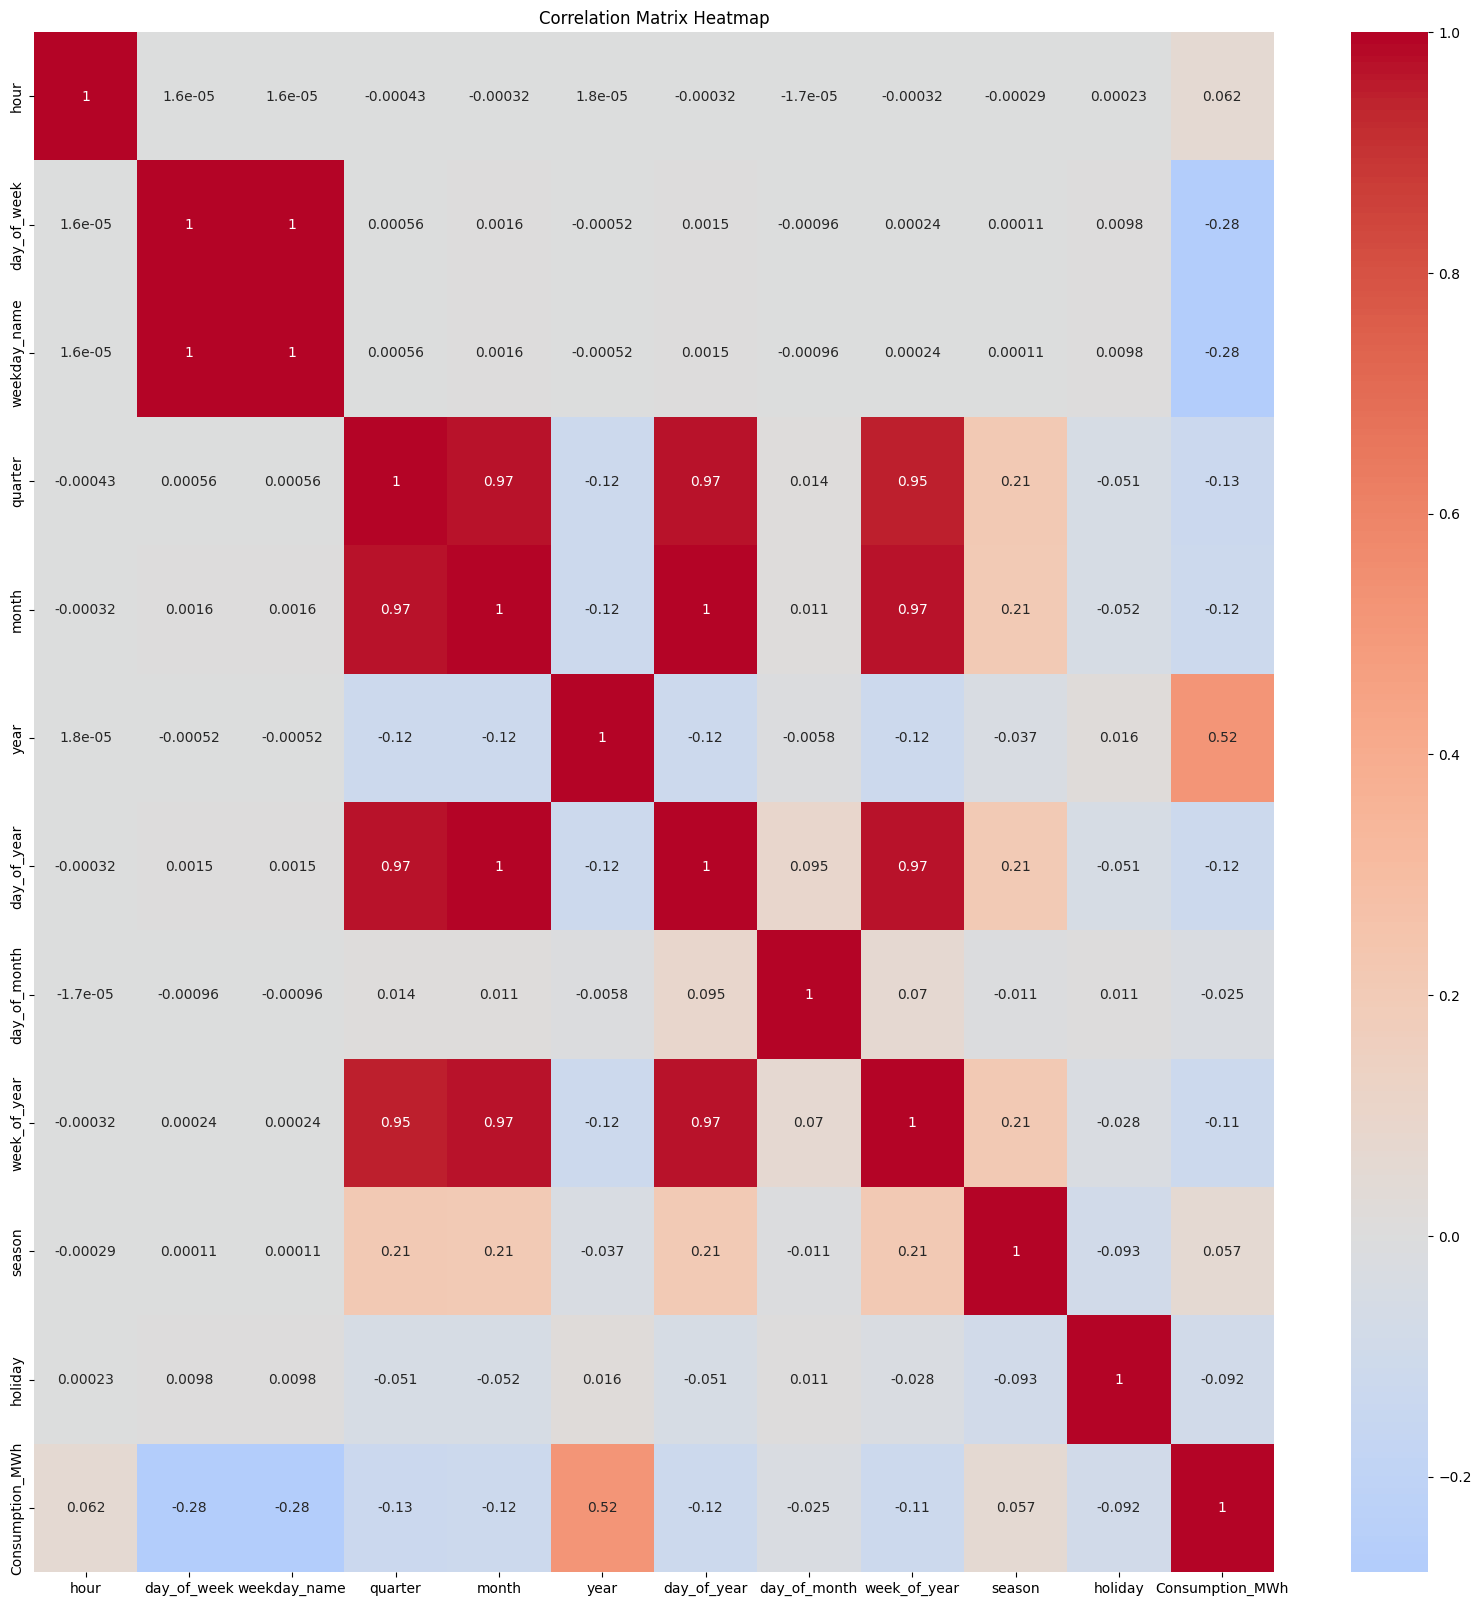

In [90]:
# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Split data

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,GRU, Dense, Bidirectional
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import TimeDistributed, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

In [11]:
# Normalize the data
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_corr[['season', 'year', 'month', 'hour', 'Consumption_MWh']])

scaled_df = pd.DataFrame(scaled_df, columns=['season', 'year', 'month', 'hour', 'Consumption_MWh'])

In [12]:
# Create sequences
def create_sequences(df, seq_length):
    sequences = []
    labels = []
    for i in range(len(df) - seq_length):
        seq = df.iloc[i:i+seq_length].values
        label = df['Consumption_MWh'].iloc[i+seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

SEQ_LENGTH = 24  # for 24 hours sequence
sequences, labels = create_sequences(scaled_df, SEQ_LENGTH)

In [14]:
labels

array([0.14845213, 0.14614699, 0.14893835, ..., 0.40813699, 0.43167281,
       0.47514127])

In [16]:


# Split the data into training (60%), validation (20%), and test (20%) sets
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, shuffle=False)


In [17]:
# Simple RNN Model Definition
rnn_model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(SEQ_LENGTH, X_train.shape[2])),
    SimpleRNN(50),
    Dense(1)
])

In [18]:
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
# Simple RNN Model Training
rnn_history = rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2113/2113 [==============================] - 26s 11ms/step - loss: 0.0019 - val_loss: 4.6336e-04
Epoch 2/10
2113/2113 [==============================] - 22s 10ms/step - loss: 3.1696e-04 - val_loss: 2.6367e-04
Epoch 3/10
2113/2113 [==============================] - 23s 11ms/step - loss: 2.5913e-04 - val_loss: 1.6391e-04
Epoch 4/10
2113/2113 [==============================] - 18s 9ms/step - loss: 2.4402e-04 - val_loss: 3.0927e-04
Epoch 5/10
2113/2113 [==============================] - 18s 9ms/step - loss: 2.1730e-04 - val_loss: 1.6583e-04
Epoch 6/10
2113/2113 [==============================] - 18s 9ms/step - loss: 2.0032e-04 - val_loss: 2.8231e-04
Epoch 7/10
2113/2113 [==============================] - 22s 11ms/step - loss: 1.8779e-04 - val_loss: 1.4846e-04
Epoch 8/10
2113/2113 [==============================] - 23s 11ms/step - loss: 1.8219e-04 - val_loss: 2.3621e-04
Epoch 9/10
2113/2113 [==============================] - 23s 11ms/step - loss: 1.7122e-04 - val_loss: 1.6759e-04

In [20]:
# Simple RNN Model Evaluation
rnn_predictions = rnn_model.predict(X_test)

661/661 [==============================] - 4s 5ms/step


In [21]:
# Calculate evaluation metrics for Simple RNN
rnn_r2 = r2_score(y_test, rnn_predictions)
rnn_mae = mean_absolute_error(y_test, rnn_predictions)
rnn_mse = mean_squared_error(y_test, rnn_predictions)
rnn_rmse = np.sqrt(rnn_mse)

print(f'Simple RNN - R² Score: {rnn_r2}')
print(f'Simple RNN - Mean Absolute Error (MAE): {rnn_mae}')
print(f'Simple RNN - Mean Squared Error (MSE): {rnn_mse}')
print(f'Simple RNN - Root Mean Squared Error (RMSE): {rnn_rmse}')

Simple RNN - R² Score: 0.9018989464435341
Simple RNN - Mean Absolute Error (MAE): 0.021061084113369082
Simple RNN - Mean Squared Error (MSE): 0.0016368874275711268
Simple RNN - Root Mean Squared Error (RMSE): 0.040458465462386566


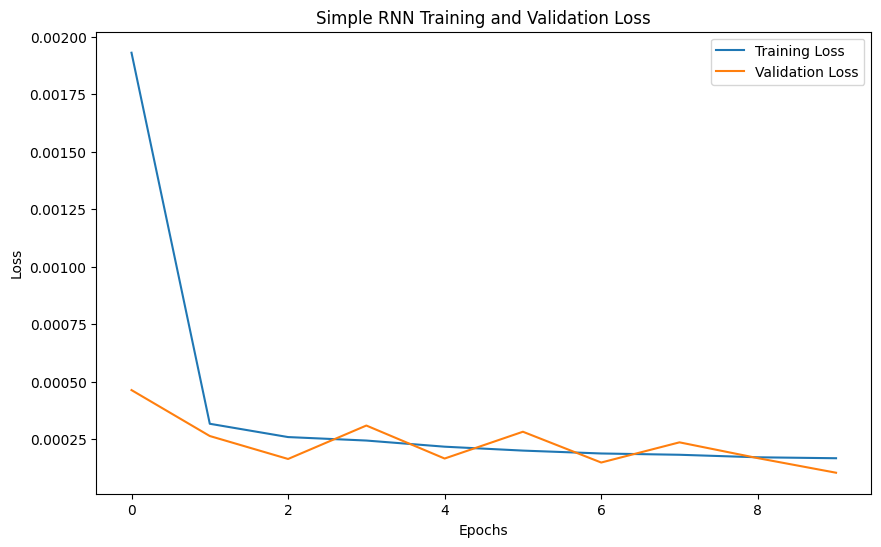

In [22]:
# Simple RNN
plt.figure(figsize=(10,6))
plt.plot(rnn_history.history['loss'], label='Training Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.title('Simple RNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

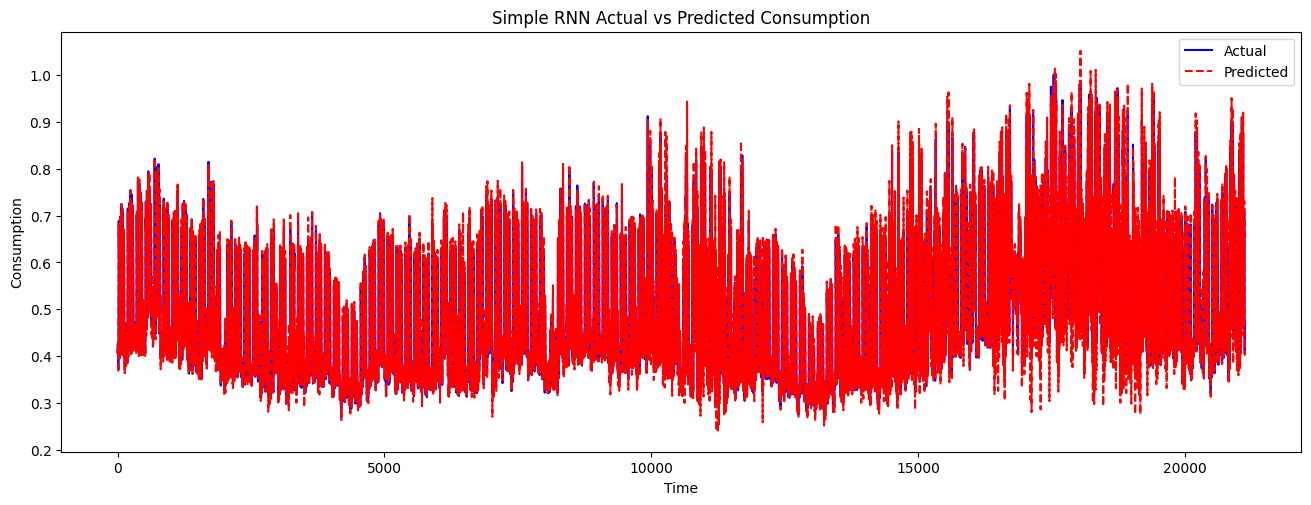

In [23]:
plt.figure(figsize=(16, 12))
# Simple RNN
plt.subplot(2, 1, 1)
plt.plot(y_test, label='Actual', color='blue')
plt.plot(rnn_predictions, label='Predicted', color='red', linestyle='dashed')
plt.title('Simple RNN Actual vs Predicted Consumption')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()